In [1]:
!pip install deoldify

In [2]:
!pip install fastprogress

In [3]:
import requests
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the URL of the pre-trained model
model_url = "https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth"

# Define the local path where you want to save the model
model_path = "models/ColorizeArtistic_gen.pth"

# Check if the models directory exists, and if not, create it
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Download the model file using requests
response = requests.get(model_url)

# Check if the download was successful
if response.status_code == 200:
    with open(model_path, 'wb') as file:
        file.write(response.content)
    print("Pre-trained model downloaded successfully.")
else:
    print("Failed to download the pre-trained model.")


Pre-trained model downloaded successfully.


In [8]:
from deoldify import device
from deoldify.device_id import DeviceId

# Set the device to CPU
device.set(device=DeviceId.CPU)

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .* set is empty.*?")

from deoldify.visualize import *

C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


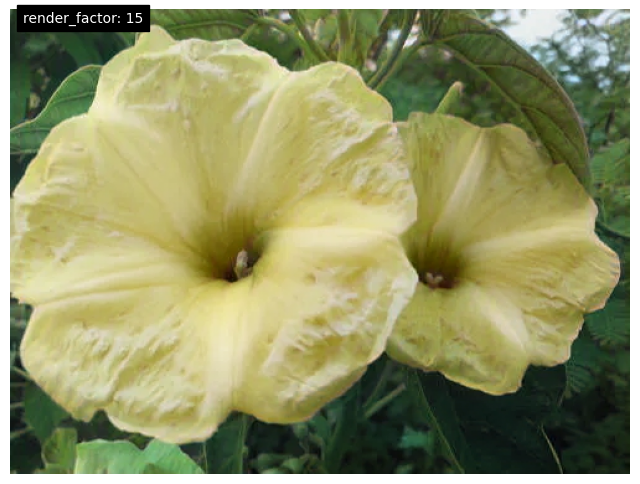

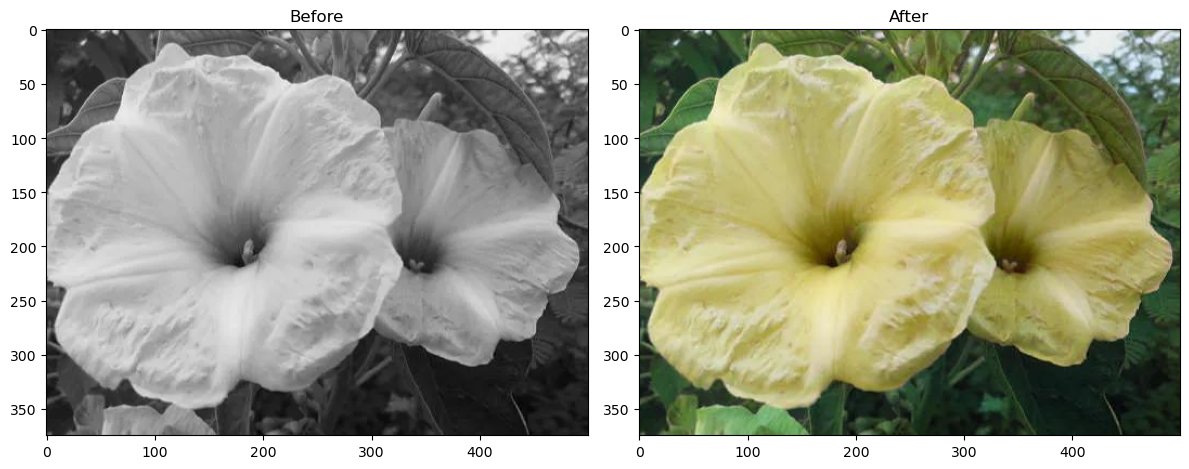

In [9]:
# Create a colorizer instance
colorizer = get_image_colorizer(artistic=True)

# Colorize an image from file
colorizer.plot_transformed_image('new.jpg', render_factor=15, display_render_factor=True, figsize=(8, 8), results_dir=Path('./result_images'))


# Load the "before" (black and white) image
bw_image = mpimg.imread('new.jpg')

# Load the "after" (colorized) image
colorized_image = mpimg.imread('result_images/new.jpg')

# Create a subplot with two columns for before and after images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bw_image, cmap='gray')  # Display the black and white image
plt.title('Before')

plt.subplot(1, 2, 2)
plt.imshow(colorized_image)  # Display the colorized image
plt.title('After')

plt.tight_layout()
plt.show()